In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [79]:
datas = load_breast_cancer()

In [80]:
data = pd.DataFrame(datas.data, columns=datas.feature_names)

In [81]:
data.head()
y=datas.target
name=np.array(y)
y=pd.DataFrame(name)
X=data


In [82]:
print(data.shape)
print(y.shape)

(569, 30)
(569, 1)


## Training the data 

In [83]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test=train_test_split(data , y , test_size=0.4 , random_state=2)

In [84]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
330,16.03,15.51,105.80,793.2,0.09491,0.13710,0.120400,0.070410,0.1782,0.05976,...,18.76,21.98,124.30,1070.0,0.14350,0.44780,0.49560,0.19810,0.3019,0.09124
555,10.29,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.027380,0.1593,0.06127,...,10.84,34.91,69.57,357.6,0.13840,0.17100,0.20000,0.09127,0.2226,0.08283
460,17.08,27.15,111.20,930.9,0.09898,0.11100,0.100700,0.064310,0.1793,0.06281,...,22.96,34.49,152.10,1648.0,0.16000,0.24440,0.26390,0.15550,0.3010,0.09060
232,11.22,33.81,70.79,386.8,0.07780,0.03574,0.004967,0.006434,0.1845,0.05828,...,12.36,41.78,78.44,470.9,0.09994,0.06885,0.02318,0.03002,0.2911,0.07307
425,10.03,21.28,63.19,307.3,0.08117,0.03912,0.002470,0.005159,0.1630,0.06439,...,11.11,28.94,69.92,376.3,0.11260,0.07094,0.01235,0.02579,0.2349,0.08061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,10.51,23.09,66.85,334.2,0.10150,0.06797,0.024950,0.018750,0.1695,0.06556,...,10.93,24.22,70.10,362.7,0.11430,0.08614,0.04158,0.03125,0.2227,0.06777
534,10.96,17.62,70.79,365.6,0.09687,0.09752,0.052630,0.027880,0.1619,0.06408,...,11.62,26.51,76.43,407.5,0.14280,0.25100,0.21230,0.09861,0.2289,0.08278
493,12.46,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.011490,0.1613,0.06013,...,13.19,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028
527,12.34,12.27,78.94,468.5,0.09003,0.06307,0.029580,0.026470,0.1689,0.05808,...,13.61,19.27,87.22,564.9,0.12920,0.20740,0.17910,0.10700,0.3110,0.07592


In [85]:
y_train

,0
330,0
555,1
460,0
232,1
425,1
...,...
299,1
534,1
493,1
527,1


## Scaling the data 

In [86]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

In [87]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

## Using LinearRegression

In [88]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [89]:
lr.fit(X_train_scaled , y_train)

LinearRegression()

In [90]:
y_pred=lr.predict(X_test_scaled)

In [91]:
from sklearn.metrics import accuracy_score
y_pred_class = (y_pred >= 0.5).astype(int)

In [92]:
score = accuracy_score(y_test, y_pred_class)

In [93]:
print("the accuracy of LInear Regression if = ",score)

the accuracy of LInear Regression if =  0.9342105263157895


In [97]:
print(X.shape)

(569, 30)


### Creating a neural network

In [66]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [140]:
model=keras.Sequential([
     keras.layers.Flatten(input_shape=(30, )),
     keras.layers.Dense(50 , activation='relu'),
     keras.layers.Dense(20 , activation='relu'),
     keras.layers.Dense(20 , activation='relu'),
     keras.layers.Dense(2 , activation='sigmoid')
])

c:\Users\shash\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [141]:
model.compile(optimizer='adam' ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [142]:
history=model.fit(X_train_scaled , y_train , validation_split=0.1 , epochs=10)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6217 - loss: 0.6506 - val_accuracy: 0.9429 - val_loss: 0.4688
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9299 - loss: 0.4586 - val_accuracy: 0.9714 - val_loss: 0.3349
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9489 - loss: 0.3021 - val_accuracy: 0.9714 - val_loss: 0.2354
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9438 - loss: 0.2238 - val_accuracy: 0.9714 - val_loss: 0.1797
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9870 - loss: 0.1352 - val_accuracy: 0.9714 - val_loss: 0.1527
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9716 - loss: 0.1191 - val_accuracy: 0.9714 - val_loss: 0.1418
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9752 - loss: 0.0898 - val_accuracy: 0.9714 - val_loss: 0.1322
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9770 - loss: 0.0884 - val_accuracy: 0.9714 - val_loss

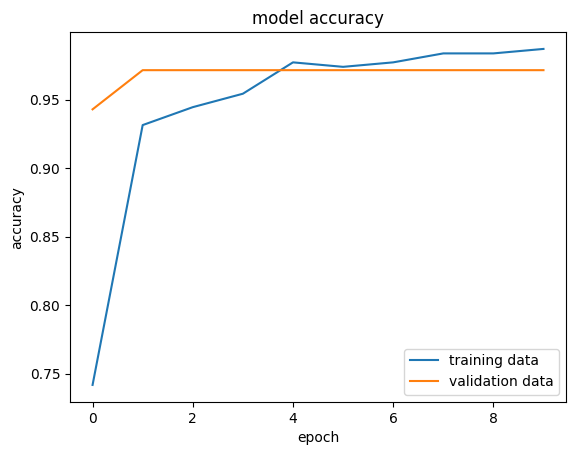

In [144]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

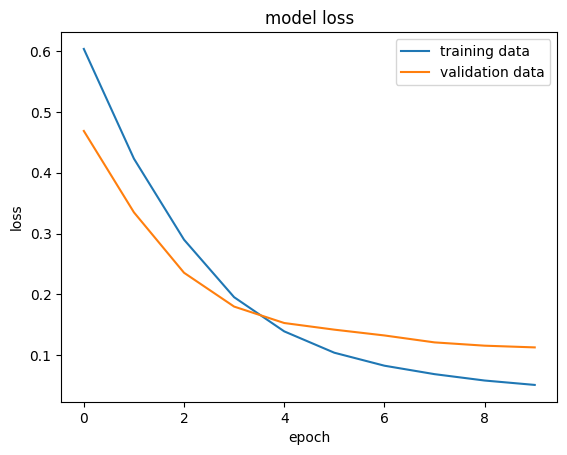

In [145]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [146]:
from sklearn.metrics import accuracy_score


In [147]:
model.fit(X_train_scaled , y_train)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9895 - loss: 0.0499 


In [151]:
y_pred=model.predict(X_test_scaled)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [154]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(accuracy)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9616 - loss: 0.1086 
0.9605262875556946
